In [14]:
'''
3.3.2 単純パーセプトロン
'''

import numpy as np
import matplotlib.pyplot as plt


class SimplePerceptron(object):
    '''
    単純パーセプトロン
    '''
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.w = np.random.normal(size=(input_dim,))
        self.b = 0.

    def forward(self, x):
        y = step(np.matmul(self.w, x) + self.b)
        return y

    def compute_deltas(self, x, t):
        y = self.forward(x)
        delta = y - t
        dw = delta * x
        db = delta

        return dw, db



In [15]:
class Simpleperceptron(object):
    def forward(self,x):
        y=step(np.matmul(self.w, x)+self.b)
        return y
def step(x):
    return 1*(x>0)

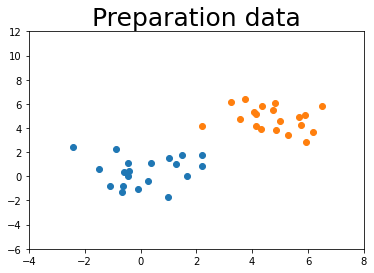

In [21]:

np.random.seed(123)  # 乱数シード

'''
1. データの準備
'''
d = 2   # 入力次元
N = 20  # 全データ数

mean = 5

x1 = np.random.randn(N//2, d) + np.array([0, 0])
x2 = np.random.randn(N//2, d) + np.array([mean, mean])
x3 = np.random.randn(N//2, d) + np.array([0, 0])
x4 = np.random.randn(N//2, d) + np.array([mean, mean])

t1 = np.zeros(N//2)
t2 = np.ones(N//2)

x = np.concatenate((x1, x2), axis=0)  # 入力データ
t = np.concatenate((t1, t2))          # 出力データ

plt.scatter(x1,x3)
plt.scatter(x2,x4)
plt.title("Preparation data",fontsize=25)
#plt.xlabel("x",fontsize=18)
#plt.ylabel("1+sinx",fontsize=18)
plt.xlim(-4,8)
plt.ylim(-6,12)
plt.show()

In [46]:
   '''
    2. モデルの構築
    '''
model = SimplePerceptron(input_dim=d)

In [47]:
 
    '''
    3. モデルの学習
    '''
def compute_loss(dw, db):
        return all(dw == 0) * (db == 0)

def train_step(x, t):
        dw, db = model.compute_deltas(x, t)
        loss = compute_loss(dw, db)
        model.w = model.w - dw
        model.b = model.b - db

        return loss

while True:
        classified = True
        for i in range(N):
            loss = train_step(x[i], t[i])
            classified *= loss
        if classified:
            break

In [48]:
  '''
    4. モデルの評価
    '''
print('w:', model.w) 
print('b:', model.b)  

print('(0, 0) =>', model.forward([0, 0]))  
print('(5, 5) =>', model.forward([5, 5]))  

w: [2.22951939 2.96727454]
b: -13.0
(0, 0) => 0
(5, 5) => 1


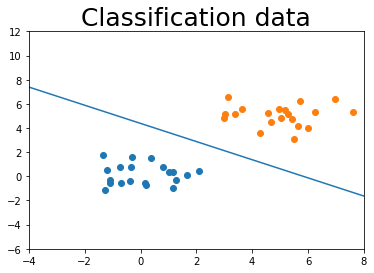

In [24]:
d = 2   # 入力次元
N = 20  # 全データ数

mean = 5

x1 = np.random.randn(N//2, d) + np.array([0, 0])
x2 = np.random.randn(N//2, d) + np.array([mean, mean])
x3 = np.random.randn(N//2, d) + np.array([0, 0])
x4 = np.random.randn(N//2, d) + np.array([mean, mean])

t1 = np.zeros(N//2)
t2 = np.ones(N//2)

x = np.concatenate((x1, x2), axis=0)  # 入力データ
t = np.concatenate((t1, t2))          # 出力データ
a = np.linspace(-4,8)
b = -2.22951939/2.96727454*a + 13/2.96727454 
plt.scatter(x1,x3)
plt.scatter(x2,x4)
plt.plot(a,b)
plt.title("Classification data",fontsize=25)
#plt.xlabel("x",fontsize=18)
#plt.ylabel("1+sinx",fontsize=18)
plt.xlim(-4,8)
plt.ylim(-6,12)
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

signal = pd.DataFrame(
    [
        [0,0],
        [1,0],
        [0,1],
        [1,1]
    ],
    columns = ["x1", "x2"]
)

In [3]:
# AND
AND = signal.copy()
AND["y"] = signal.x1 & signal.x2
AND

,x1,x2,y
0,0,0,0
1,1,0,0
2,0,1,0
3,1,1,1


In [12]:
def AND_gate(x1,x2):
    w1,w2 = 0.5,0.5
    theta = 0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta:
        y = 0
    else:
        y = 1
    return y

In [22]:
print(AND_gate(0,0))
print(AND_gate(1,0))
print(AND_gate(0,1))
print(AND_gate(1,1))

0
0
0
1


In [26]:
def AND(x1,x2):
    w1,w2 = 0.5,0.5
    wn = -0.7
    z = w1*x1 + w2*x2 + wn
    if z <= 0:
        y = 0
    else:
        y = 1
    return y
 
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


In [51]:
import numpy as np

#重み初期値
w = np.array([3.0, 3.0, 3.0])

#入力
input_array = np.array([[1,0,0],[1,1,0],[1,0,1],[1,1,1]])

#正解データ
training_data = np.array([0,0,0,1])



#パーセプトロンによるAND関数
def AND(x):
  temp = np.sum(x*w)
  if temp <= 0:
    return 0
  else:
    return 1

#誤り訂正量の計算
def w_update(w,y,i):
  eta = 0.1
  return eta*(training_data[i] - y)*input_array[i]

i = 0
zeros = 0

print("init W = {0}".format(w))


#学習ループ
while 1:
  index = i%4

  #AND関数の計算
  y = AND(input_array[index])

  #誤り訂正量の計算
  dw = w_update(w,y,index)
  w += dw

  #途中計算の表示デフォルトではコメントアウト
  #print("{5} : x = {3} : y = {0} : t = {1} : w = {2} : dw = {4}".format(y,training_data[index],w,input_array[index],dw,i))

  #重みの訂正量が4回続けて0の時学習を終了する
  if (np.sum(dw) == 0):
    zeros += 1
  else:
    zeros = 0
  if (zeros >= 4):
    break

  i += 1

#学習結果表示
print("W = {0}".format(w))

init W = [3. 3. 3.]
W = [-1.4  1.3  1.3]


In [ ]:
# プロット
plt.figure(figsize=(8, 7))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k')

line = np.linspace(-15, 15)
plt.plot(line, -(line * coef[0] + intercept) / coef[1], c='g', label="Perceptron")
plt.ylim(-2.9, 3.4)
plt.xlim(-2, 1.8)
plt.legend()